## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], pos='after'):
    input_layer = keras.layers.Input(input_shape)
    
    if pos=='after':
        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1))(input_layer)
                x = BatchNormalization()(x)
            else:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1))(x)
                x = BatchNormalization()(x)
    else:
        for i, n_units in enumerate(num_neurons):
            if i == 0:
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1))(input_layer)
            else:
                x = BatchNormalization()(x)
                x = keras.layers.Dense(units=n_units, 
                                       activation="relu", 
                                       name="hidden_layer"+str(i+1))(x)
                
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256 ]
MOMENTUM = 0.95
BATCH_POS = ['before', 'after']

In [7]:
results = {}
"""
Write your training loop and record results
"""
for pos in BATCH_POS:
    for batch in BATCH_SIZE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with BATCH_POS = %s, BATCH_SIZE = %.6f" % (pos, batch))
        model = build_mlp(input_shape=x_train.shape[1:], pos=pos)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=batch, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-pos-%s" % str(pos) + " , " + "exp-batch-%s" % str(batch)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with BATCH_POS = before, BATCH_SIZE = 2.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)    

50000/50000 [==============================] - 105s 2ms/step - loss: 2.2132 - acc: 0.1800 - val_loss: 2.7159 - val_acc: 0.2342
Experiment with BATCH_POS = before, BATCH_SIZE = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense) 

Epoch 49/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.9891 - acc: 0.6461 - val_loss: 1.4268 - val_acc: 0.5238
Epoch 50/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.9805 - acc: 0.6488 - val_loss: 1.4562 - val_acc: 0.5147
Experiment with BATCH_POS = before, BATCH_SIZE = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
b

50000/50000 [==============================] - 7s 137us/step - loss: 0.7183 - acc: 0.7396 - val_loss: 1.8174 - val_acc: 0.4814
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7128 - acc: 0.7423 - val_loss: 1.6737 - val_acc: 0.5059
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7002 - acc: 0.7504 - val_loss: 1.7263 - val_acc: 0.4989
Experiment with BATCH_POS = before, BATCH_SIZE = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_

50000/50000 [==============================] - 3s 58us/step - loss: 0.2953 - acc: 0.9004 - val_loss: 2.4196 - val_acc: 0.4564
Epoch 48/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.2922 - acc: 0.9023 - val_loss: 2.1163 - val_acc: 0.4886
Epoch 49/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.2689 - acc: 0.9117 - val_loss: 2.4987 - val_acc: 0.4593
Epoch 50/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.2575 - acc: 0.9149 - val_loss: 2.3388 - val_acc: 0.4772
Experiment with BATCH_POS = before, BATCH_SIZE = 256.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batc

50000/50000 [==============================] - 2s 42us/step - loss: 0.2496 - acc: 0.9294 - val_loss: 2.1157 - val_acc: 0.4830
Epoch 47/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2411 - acc: 0.9324 - val_loss: 2.2707 - val_acc: 0.4776
Epoch 48/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2327 - acc: 0.9339 - val_loss: 2.2845 - val_acc: 0.4774
Epoch 49/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2128 - acc: 0.9420 - val_loss: 2.2958 - val_acc: 0.4763
Epoch 50/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2033 - acc: 0.9453 - val_loss: 2.2202 - val_acc: 0.4849
Experiment with BATCH_POS = after, BATCH_SIZE = 2.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
h

50000/50000 [==============================] - 123s 2ms/step - loss: 2.2523 - acc: 0.1477 - val_loss: 3.2495 - val_acc: 0.1703
Epoch 45/50
50000/50000 [==============================] - 123s 2ms/step - loss: 2.2507 - acc: 0.1478 - val_loss: 3.7178 - val_acc: 0.1667
Epoch 46/50
50000/50000 [==============================] - 123s 2ms/step - loss: 2.2496 - acc: 0.1507 - val_loss: 3.3992 - val_acc: 0.1715
Epoch 47/50
50000/50000 [==============================] - 123s 2ms/step - loss: 2.2499 - acc: 0.1525 - val_loss: 3.5367 - val_acc: 0.1683
Epoch 48/50
50000/50000 [==============================] - 123s 2ms/step - loss: 2.2486 - acc: 0.1520 - val_loss: 3.3442 - val_acc: 0.1462: 
Epoch 49/50
50000/50000 [==============================] - 123s 2ms/step - loss: 2.2506 - acc: 0.1487 - val_loss: 3.3545 - val_acc: 0.1536
Epoch 50/50
50000/50000 [==============================] - 123s 2ms/step - loss: 2.2508 - acc: 0.1548 - val_loss: 3.5589 - val_acc: 0.1814
Experiment with BATCH_POS = after, BA

Epoch 42/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.1395 - acc: 0.5961 - val_loss: 1.3743 - val_acc: 0.5209
Epoch 43/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.1386 - acc: 0.5972 - val_loss: 1.3548 - val_acc: 0.5275
Epoch 44/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.1162 - acc: 0.6029 - val_loss: 1.3464 - val_acc: 0.5287
Epoch 45/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.1377 - acc: 0.5978 - val_loss: 1.3784 - val_acc: 0.5156
Epoch 46/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.1384 - acc: 0.5955 - val_loss: 1.3701 - val_acc: 0.5231
Epoch 47/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.1294 - acc: 0.6007 - val_loss: 1.3558 - val_acc: 0.5221
Epoch 48/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.1264 - acc: 0.6000 - val_loss: 1.3477 - val_acc: 0.5294
Epoch 49/50
50000/50

50000/50000 [==============================] - 8s 160us/step - loss: 0.8647 - acc: 0.6924 - val_loss: 1.5045 - val_acc: 0.5122
Epoch 41/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.8652 - acc: 0.6914 - val_loss: 1.6350 - val_acc: 0.4753
Epoch 42/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.8532 - acc: 0.6940 - val_loss: 1.6352 - val_acc: 0.4841
Epoch 43/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.8417 - acc: 0.6994 - val_loss: 1.5249 - val_acc: 0.5146
Epoch 44/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.8305 - acc: 0.7040 - val_loss: 1.5487 - val_acc: 0.5021
Epoch 45/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.8282 - acc: 0.7052 - val_loss: 1.5534 - val_acc: 0.5146
Epoch 46/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.8156 - acc: 0.7079 - val_loss: 1.5348 - val_acc: 0.5141
Epoch 47/50
50000/50000 [==============

50000/50000 [==============================] - 3s 64us/step - loss: 0.3945 - acc: 0.8641 - val_loss: 2.1968 - val_acc: 0.4671
Epoch 39/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.3769 - acc: 0.8707 - val_loss: 2.1311 - val_acc: 0.4831
Epoch 40/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.3694 - acc: 0.8715 - val_loss: 2.4599 - val_acc: 0.4437
Epoch 41/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.3641 - acc: 0.8758 - val_loss: 2.2905 - val_acc: 0.4667
Epoch 42/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.3473 - acc: 0.8800 - val_loss: 2.3049 - val_acc: 0.4738
Epoch 43/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.3360 - acc: 0.8844 - val_loss: 2.4068 - val_acc: 0.4653
Epoch 44/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.3401 - acc: 0.8824 - val_loss: 2.4500 - val_acc: 0.4547
Epoch 45/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 45us/step - loss: 0.3748 - acc: 0.8821 - val_loss: 2.1656 - val_acc: 0.4511
Epoch 37/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.3533 - acc: 0.8906 - val_loss: 2.1663 - val_acc: 0.4647
Epoch 38/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.3405 - acc: 0.8933 - val_loss: 2.0771 - val_acc: 0.4697
Epoch 39/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.3224 - acc: 0.9013 - val_loss: 2.1228 - val_acc: 0.4590
Epoch 40/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.3036 - acc: 0.9073 - val_loss: 2.1269 - val_acc: 0.4684
Epoch 41/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.2797 - acc: 0.9174 - val_loss: 2.1783 - val_acc: 0.4626
Epoch 42/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.2757 - acc: 0.9172 - val_loss: 2.2286 - val_acc: 0.4656
Epoch 43/50
50000/50000 [=====================

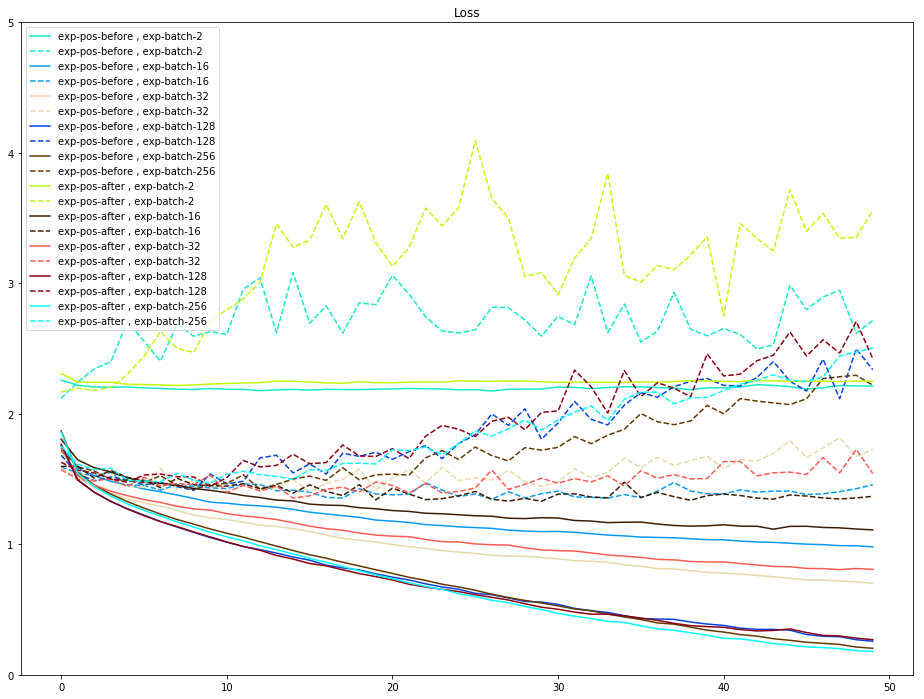

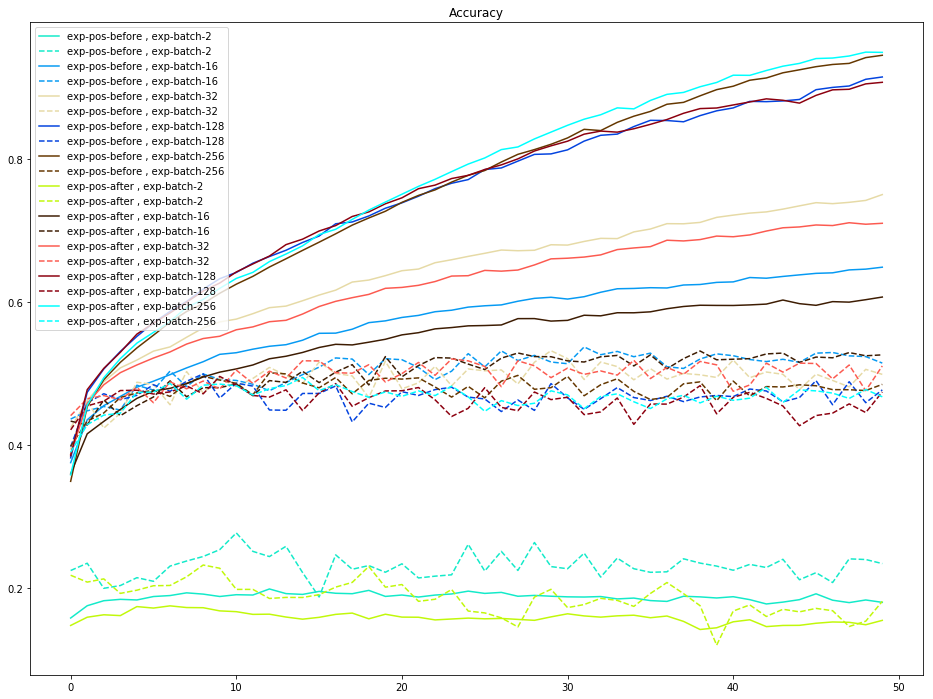

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
Plot results
"""
color_bar = ["xkcd:aqua", "xkcd:azure", "xkcd:beige", "xkcd:blue", "xkcd:brown", "xkcd:chartreuse", 
             "xkcd:chocolate", "xkcd:coral", "xkcd:crimson", "xkcd:cyan", "xkcd:darkblue", "xkcd:darkgreen", 
             "xkcd:fuchsia", "xkcd:gold", "xkcd:green", "xkcd:gray", "xkcd:indigo", "xkcd:ivory", 
             "xkcd:khaki", "xkcd:lavender", "xkcd:lightblue", "xkcd:lightgreen", "xkcd:lime", "xkcd:orange"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()